<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/03-Pandas/A1-Introduction_to_Pandas_with_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
matplotlib.style.use(["seaborn-talk", "seaborn-ticks", "seaborn-whitegrid"])

# Loading Data

## From CSV Files

We will use a dataset with [restaurant inspection results in NYC](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

We fetch it by executing the following command:

In [4]:
# Fetches the most recent dataset
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o restaurant.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  174M    0  174M    0     0  7118k      0 --:--:--  0:00:25 --:--:-- 7797k


We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [5]:
import pandas as pd

restaurants = pd.read_csv(
    "restaurant.csv",
    encoding="utf_8",
    dtype="unicode",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False,
)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [ ]:
restaurants.head(5)

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

# Data Types and Conversions

We can also check the data types for each column

In [ ]:
restaurants.dtypes

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [ ]:
restaurants.describe()

In [ ]:
# Same as above, but the .T command transposes the table
restaurants.describe().T

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [47]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants["Latitude"] = pd.to_numeric(restaurants["Latitude"])
restaurants["Longitude"] = pd.to_numeric(restaurants["Longitude"])
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
Latitude                        float64
Longitude                       float64
Community Board                  object
Council District                 object
Census Tract                     object
BIN                              object
BBL                              object


###  Converting Data to Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [46]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"])
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"])
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"])

#### Note


In tricky cases, we may need to pass the `format` parameter, specifying the formatting of the date. For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).


### Converting Data to Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [ ]:
restaurants["BORO"] = pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] = pd.Categorical(
    restaurants["GRADE"], categories=["A", "B", "C"], ordered=True
)
restaurants["VIOLATION CODE"] = pd.Categorical(
    restaurants["VIOLATION CODE"], ordered=False
)
restaurants["CRITICAL FLAG"] = pd.Categorical(
    restaurants["CRITICAL FLAG"], ordered=False
)
restaurants["ACTION"] = pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] = pd.Categorical(
    restaurants["CUISINE DESCRIPTION"], ordered=False
)

restaurants["INSPECTION TYPE"] = pd.Categorical(
    restaurants["INSPECTION TYPE"], ordered=False
)

restaurants.dtypes

## Descriptive statistics



### Descriptive Statistics for Numeric Variables


#### Basic descriptive statistics for numeric variables

Given that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [ ]:
restaurants["SCORE"].describe()

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

In [ ]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

In [ ]:
restaurants["SCORE"].hist(bins=50)

In [ ]:
# A quick exposure to various options of the "hist" command
restaurants["SCORE"].hist(
    bins=50,  # use 50 bars
    range=(0, 50),  # x-axis from 0 to 50
    density=True,  # show normalized count (density=True), or raw counts (density= False)
    figsize=(15, 5),  # controls the size of the plot
    alpha=0.8,  # make the plot 20% transparent
)

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

In [ ]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants["SCORE"].plot(kind="kde", color="Black", xlim=(0, 50), figsize=(15, 5))

#### Extra: Combining plots

Just as a quick note, we can actually easily combine plots in Pandas, by saving a plot in a variable, and then passing the parameter `ax = ....` in the new figure that we are creating. That `ax` parameter indicates that we want to plot the new chart on top of the plot specified in the `ax` parameter.

In [ ]:
# We save the plot in the variable "histogram_figure"
histogram_figure = restaurants["SCORE"].hist(
    bins=50,  # use 50 bars
    range=(0, 50),  # x-axis from 0 to 50
    density=True,  # show normalized count (density=True), or raw counts (density= False)
    figsize=(15, 5),  # controls the size of the plot
    alpha=0.8,  # make the plot 20% transparent
)

# To combine the plots, we pass the ax = histogram_figure parameter
restaurants["SCORE"].plot(
    kind="kde", color="Black", xlim=(0, 75), figsize=(15, 5), ax=histogram_figure
)

### Descriptive Statistics for Dates


In [ ]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe(datetime_is_numeric=True)

In [ ]:
restaurants["INSPECTION DATE"].describe(datetime_is_numeric=True)

In [ ]:
restaurants["GRADE DATE"].describe(datetime_is_numeric=True)

In [ ]:
restaurants["RECORD DATE"].describe(datetime_is_numeric=True)

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2016 and 04/30/2020.

In [ ]:
# your code here

#### Solution

In [ ]:
# Not very appealing
restaurants["INSPECTION DATE"].hist()

In [ ]:
restaurants["GRADE DATE"].hist()

In [ ]:
x_start = pd.to_datetime("2016-01-01")
x_end = pd.to_datetime("2021-05-31")
bins = (x_end - x_start) / np.timedelta64(1, "M")  # one bin per month

restaurants["INSPECTION DATE"].hist(
    range=(
        x_start,
        x_end,
    ),  # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins=round(bins),  # number of months in the range -- computed manually
    figsize=(15, 5),  # resize 15-width, 5-height
)

In [ ]:
restaurants["GRADE DATE"].hist(
    range=(
        x_start,
        x_end,
    ),  # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins=round(bins),  # number of months in the range -- computed manually
    figsize=(15, 5),  # resize 15-width, 5-height
)

### Descriptive Statistics for Categorical/string columns

We can also get quick statistics about the common values that appear in each column:

In [ ]:
restaurants["DBA"].value_counts()

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20].plot(kind="barh")

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:20].plot(kind="barh")

In [ ]:
# We can invert the list by starting at element 19 (the 20th element)
# and then go to the beginning of the list going backwards (the :-1 at the end)
popular[19::-1].plot(kind="barh")

In [ ]:
restaurants["VIOLATION CODE"].head(5)

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts()
violation_counts[0:10]

In [ ]:
violation_counts[0:20].plot(kind="bar")

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [ ]:
# your code here

#### Solution 

In [ ]:
restaurants["BORO"].value_counts()

In [ ]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

In [ ]:
restaurants["BORO"].value_counts().plot(kind="bar")

In [ ]:
restaurants["BORO"].value_counts().plot(kind="barh")

# Basic Data Manipulation Techniques

## Selecting a subset of the columns -- `filter()`

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [6]:
restaurants

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41313114,NEW YORK INSTITUTE OF TECHNOLOGY,Manhattan,1849,BROADWAY,10023,6462736082,American,12/20/2016,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,40,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.76935925555,-73.982118533371,107,03,014500,1027192,1011130046,MN14
1,50070793,AMITUOFO VEGAN CUISINE,Brooklyn,19,BOGART STREET,11206,7183662288,Vegan,09/04/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,53,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.703925075043,-73.932926711548,301,34,048500,3397431,3031180019,BK78
2,50070793,AMITUOFO VEGAN CUISINE,Brooklyn,19,BOGART STREET,11206,7183662288,Vegan,09/04/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,53,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.703925075043,-73.932926711548,301,34,048500,3397431,3031180019,BK78
3,40361618,SAL'S DELI,Queens,12908,20 AVENUE,11356,7186619498,Sandwiches,12/01/2017,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,24,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.781673836068,-73.839415976831,407,19,090700,4099345,4041740023,QN23
4,50035589,DAE SONG CHINESE RESAURANT,Queens,4332,CORPORAL KENNEDY ST,11361,7182292279,Chinese,04/09/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,12,A,04/09/2018,06/30/2021,Cycle Inspection / Initial Inspection,40.760105569143,-73.774229438192,411,19,146700,4000000,4062790021,QN46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416178,50094398,SOCIAL 68,Manhattan,68,AVENUE A,10009,6464908670,Latin American,10/22/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,11,A,10/22/2019,06/30/2021,Cycle Inspection / Initial Inspection,40.724641952949,-73.98454780258,103,02,003200,1005010,1004000001,MN22
416179,41707327,DRAGON STATE KITCHEN,Bronx,4124A,WHITE PLAINS ROAD,10466,7185152329,Chinese,06/12/2019,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,16,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.891433609009,-73.858445915336,212,12,042200,2063647,2048440035,BX44
416180,50056337,QI,Manhattan,698,9 AVENUE,10036,2122478991,Thai,02/10/2020,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12,NaN,NaN,06/30/2021,Cycle Inspection / Initial Inspection,40.762086602475,-73.989953832696,104,03,012700,1025119,1010380061,MN15
416181,41720707,EL GRAN CANARIO II RESTAURANT,Queens,11117,JAMAICA AVENUE,11418,7184411113,Spanish,03/10/2020,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,32,C,03/10/2020,06/30/2021,Cycle Inspection / Re-inspection,40.697005278312,-73.836970065568,409,32,013000,4192669,4092250060,QN54


In [8]:
restaurants.filter( 
    items = ["DBA", "GRADE", "GRADE DATE"] 
)

,DBA,GRADE,GRADE DATE
0,NEW YORK INSTITUTE OF TECHNOLOGY,NaN,NaN
1,AMITUOFO VEGAN CUISINE,NaN,NaN
2,AMITUOFO VEGAN CUISINE,NaN,NaN
3,SAL'S DELI,NaN,NaN
4,DAE SONG CHINESE RESAURANT,A,04/09/2018
...,...,...,...
416178,SOCIAL 68,A,10/22/2019
416179,DRAGON STATE KITCHEN,NaN,NaN
416180,QI,NaN,NaN
416181,EL GRAN CANARIO II RESTAURANT,C,03/10/2020


In [ ]:
columns = ["GRADE DATE", "VIOLATION CODE", "DBA", "SCORE"]

# Notice the use of "chain notation" below
# Chain notation means putting parentheses around
# the command and then having each operation in its
# own line
(
  restaurants
  .filter( items = columns )
  .head(10)
)


We can also use the `like` option to find all the column names that include a certain string. For example, to get all the columns that include the string `DATE`:

In [10]:
restaurants.filter(
    like = 'DATE'
)

,INSPECTION DATE,GRADE DATE,RECORD DATE
0,12/20/2016,NaN,06/30/2021
1,09/04/2019,NaN,06/30/2021
2,09/04/2019,NaN,06/30/2021
3,12/01/2017,NaN,06/30/2021
4,04/09/2018,04/09/2018,06/30/2021
...,...,...,...
416178,10/22/2019,10/22/2019,06/30/2021
416179,06/12/2019,NaN,06/30/2021
416180,02/10/2020,NaN,06/30/2021
416181,03/10/2020,03/10/2020,06/30/2021


We can expand the functionality and also use regular expressions:

In [18]:
restaurants.filter(
    regex = r'^C' # all the columns that start with C
)

,CAMIS,CUISINE DESCRIPTION,CRITICAL FLAG,Community Board,Council District,Census Tract
0,41313114,American,Critical,107,03,014500
1,50070793,Vegan,Not Critical,301,34,048500
2,50070793,Vegan,Not Critical,301,34,048500
3,40361618,Sandwiches,Not Critical,407,19,090700
4,50035589,Chinese,Critical,411,19,146700
...,...,...,...,...,...,...
416178,50094398,Latin American,Not Critical,103,02,003200
416179,41707327,Chinese,Critical,212,12,042200
416180,50056337,Thai,Critical,104,03,012700
416181,41720707,Spanish,Critical,409,32,013000


## Renaming Columns -- `rename()`

To do the equivalent of `SELECT attr AS alias` in Pandas, we use the `rename` command, and pass a dictionary specifying which columns we want to rename:



In [116]:
restaurants.rename(
    columns = {
      "CAMIS": "RESTID",
      "DBA": "REST_NAME",
      "BUILDING": "STREET_NUM",
      "BORO": "BOROUGH"
    }
)

,RESTID,REST_NAME,BOROUGH,STREET_NUM,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41313114,NEW YORK INSTITUTE OF TECHNOLOGY,Manhattan,1849,BROADWAY,10023,6462736082,American,2016-12-20,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,40.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.769359,-73.982119,107,03,014500,1027192,1011130046,MN14
1,50070793,AMITUOFO VEGAN CUISINE,Brooklyn,19,BOGART STREET,11206,7183662288,Vegan,2019-09-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,53.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.703925,-73.932927,301,34,048500,3397431,3031180019,BK78
2,50070793,AMITUOFO VEGAN CUISINE,Brooklyn,19,BOGART STREET,11206,7183662288,Vegan,2019-09-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,53.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.703925,-73.932927,301,34,048500,3397431,3031180019,BK78
3,40361618,SAL'S DELI,Queens,12908,20 AVENUE,11356,7186619498,Sandwiches,2017-12-01,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,24.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.781674,-73.839416,407,19,090700,4099345,4041740023,QN23
4,50035589,DAE SONG CHINESE RESAURANT,Queens,4332,CORPORAL KENNEDY ST,11361,7182292279,Chinese,2018-04-09,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,12.0,A,2018-04-09,2021-06-30,Cycle Inspection / Initial Inspection,40.760106,-73.774229,411,19,146700,4000000,4062790021,QN46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416178,50094398,SOCIAL 68,Manhattan,68,AVENUE A,10009,6464908670,Latin American,2019-10-22,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,11.0,A,2019-10-22,2021-06-30,Cycle Inspection / Initial Inspection,40.724642,-73.984548,103,02,003200,1005010,1004000001,MN22
416179,41707327,DRAGON STATE KITCHEN,Bronx,4124A,WHITE PLAINS ROAD,10466,7185152329,Chinese,2019-06-12,Violations were cited in the following area(s).,06F,Wiping cloths soiled or not stored in sanitizi...,Critical,16.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.891434,-73.858446,212,12,042200,2063647,2048440035,BX44
416180,50056337,QI,Manhattan,698,9 AVENUE,10036,2122478991,Thai,2020-02-10,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12.0,NaN,NaT,2021-06-30,Cycle Inspection / Initial Inspection,40.762087,-73.989954,104,03,012700,1025119,1010380061,MN15
416181,41720707,EL GRAN CANARIO II RESTAURANT,Queens,11117,JAMAICA AVENUE,11418,7184411113,Spanish,2020-03-10,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,32.0,C,2020-03-10,2021-06-30,Cycle Inspection / Re-inspection,40.697005,-73.836970,409,32,013000,4192669,4092250060,QN54


## Selecting rows -- `query()`

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [ ]:
# Find all violations for restaurants with DBA being Starbucks
restaurants.query(' DBA == "STARBUCKS" ')

In [ ]:
# Find all violations with code 04L (i.e., "has mice")
# Notice the use of backquotes for attribute names that have space
restaurants.query(' `VIOLATION CODE` == "04L" ')

In [ ]:
# We can store the result in a dataframe called  has_mice
has_mice = restaurants.query(' `VIOLATION CODE` == "04L" ')
has_mice

In [ ]:
# The most frequent DBA names overall
restaurants["DBA"].value_counts()[:20]

In [28]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   253
DUNKIN                                   152
KENNEDY FRIED CHICKEN                    127
CROWN FRIED CHICKEN                      113
STARBUCKS                                 86
MCDONALD'S                                80
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     80
POPEYES                                   75
BURGER KING                               65
DUNKIN',' BASKIN ROBBINS                  48
KFC                                       39
DOMINO'S                                  38
CARVEL                                    37
LITTLE CAESARS                            34
AMC THEATRES                              31
PAPA JOHN'S                               27
VIVI BUBBLE TEA                           22
INSOMNIA COOKIES                          21
EMPANADAS MONUMENTAL                      21
CHECKERS                                  20
Name: DBA, dtype: int64

In [29]:
has_mice["CAMIS"].value_counts()[:10]

50015263    13
50016943    13
41642251    12
50058969    12
50046623    12
50017182    11
50015341    11
50045194    11
41524890    11
40423819    11
Name: CAMIS, dtype: int64

In [ ]:
has_mice.query( ' CAMIS == "50015263" ' )

And we can use more complex conditions. 

In [ ]:
# AND in pandas is "&"
# OR in pandas is "|"

In [49]:
has_mice_10012 = (
    restaurants
    .query(' `VIOLATION CODE` == "04L" & ZIPCODE == "10012" ')
    .filter( items = ['DBA', 'BUILDING', 'STREET', 'INSPECTION DATE'])
)

has_mice_10012

,DBA,BUILDING,STREET,INSPECTION DATE
1418,SAKURA SUSHI AND THAI,273,MOTT STREET,2018-12-05
3527,ARTICHOKE BASILLE'S PIZZA & BAR,111,MACDOUGAL STREET,2019-11-18
3649,PICCOLA CUCINA,184,PRINCE STREET,2020-02-06
3672,BISTROT LEO,60,THOMPSON STREET,2018-05-09
8826,DOS CAMINOS SOHO,475,WEST BROADWAY,2018-04-05
...,...,...,...,...
410493,RAMEN-YA,133,WEST 3 STREET,2018-10-31
412090,PEPE ROSSO TO GO,149,SULLIVAN STREET,2019-01-16
412408,BOND ST,6,BOND STREET,2019-06-25
412450,BY NAME CAFE,324,BOWERY,2019-10-04


In [41]:
has_mice_10012["DBA"].value_counts()[:30]

LITTLE CUPCAKE BAKE SHOP         11
CAFETAL SOCIAL CLUB, CHACHIS      9
SPRINGBONE KITCHEN                7
EGG SHOP                          7
DANTE                             7
INSOMNIA COOKIES                  6
GROOVE                            6
PEPE ROSSO TO GO                  6
PICCOLA CUCINA                    6
MONTE'S                           6
THINK COFFEE                      6
EPISTROPHY CAFE                   5
BEN'S PIZZA                       5
BANTER                            5
GO ZEN RESTAURANT                 5
RAMEN-YA                          5
THE GRISLY PEAR                   5
VIN ET FLEURS                     5
CHOBANI SOHO                      5
VOLARE RESTAURANT                 5
THE RED LION                      5
BAO TEA HOUSE                     5
TRIONA'S                          5
BALZEM                            4
OLD TBILISI                       4
ANGELIKA FILM CENTER              4
THE FOLLY                         4
GREENWICH VILLAGE COMEDY CLU

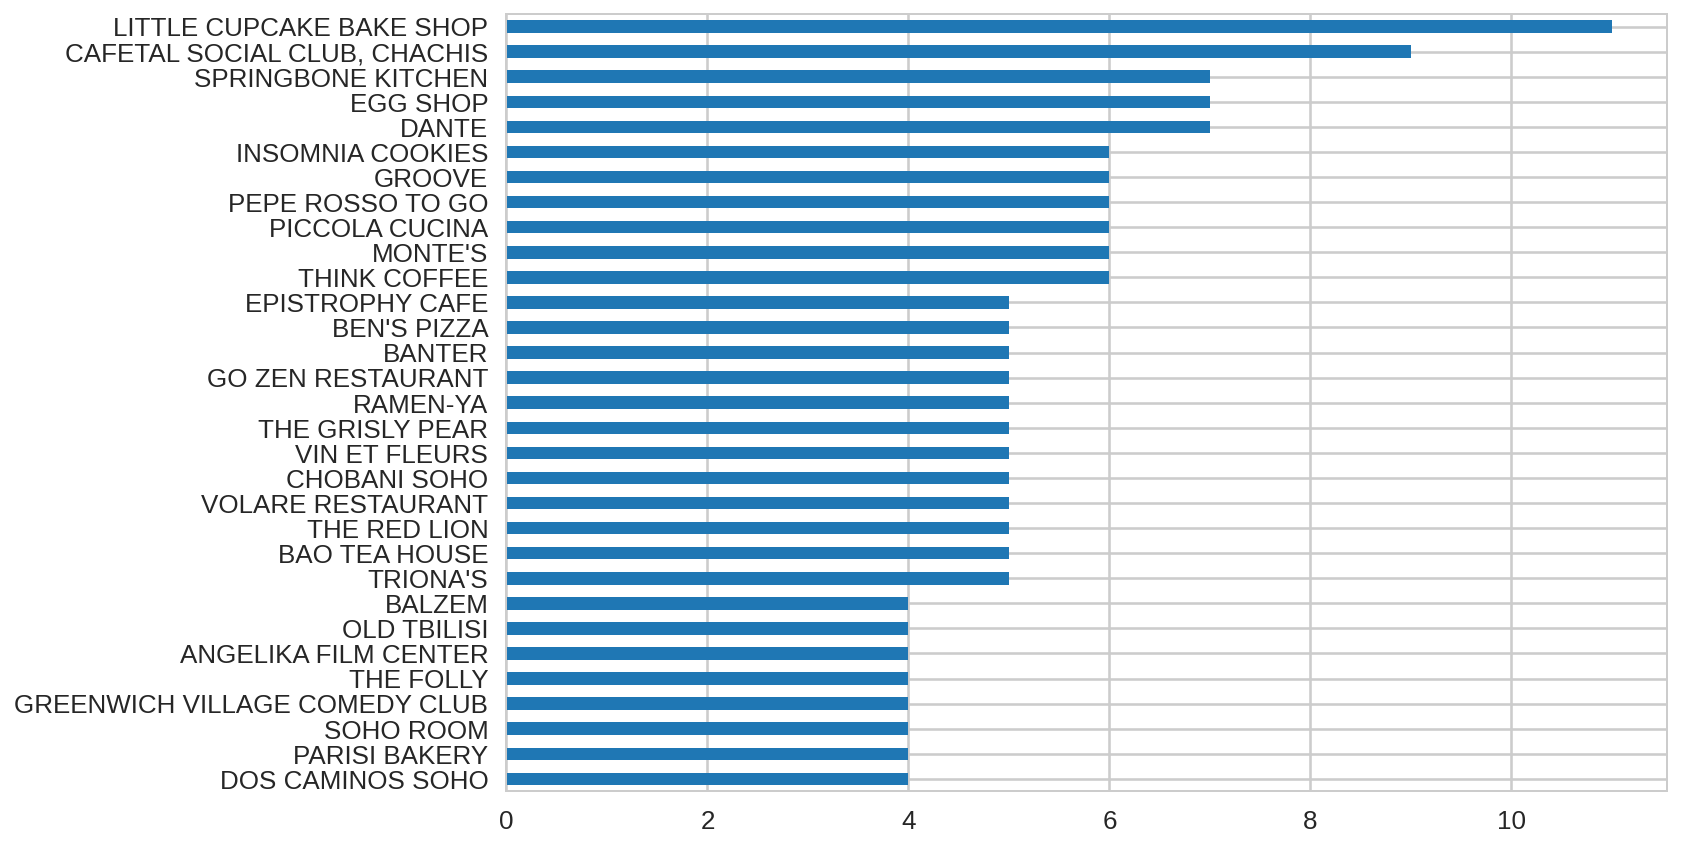

In [38]:
has_mice_10012["DBA"].value_counts()[30::-1].plot(kind="barh")

## Selecting distinct values -- `drop_duplicates()`

We can do the equivalent of `SELECT DISTINCT` in Pandas by doing the following

In [42]:
(
    has_mice_10012
    .filter( items = ['DBA', 'BUILDING', 'STREET'])
    .drop_duplicates()
)

,DBA,BUILDING,STREET
1418,SAKURA SUSHI AND THAI,273,MOTT STREET
3527,ARTICHOKE BASILLE'S PIZZA & BAR,111,MACDOUGAL STREET
3649,PICCOLA CUCINA,184,PRINCE STREET
3672,BISTROT LEO,60,THOMPSON STREET
8826,DOS CAMINOS SOHO,475,WEST BROADWAY
...,...,...,...
377327,WASHINGTON SQUARE DINER,150,WEST 4 STREET
379754,SAGE RESTAURANT NYC,352,BOWERY
384523,POMMES FRITES,128,MACDOUGAL STREET
394123,GIMME COFFEE,228,MOTT STREET


## Sorting values -- `sort_values()`

And we can do the equivalent of `ORDER BY` by using the `.sort_values()

In [53]:
(
    has_mice_10012
    .sort_values("INSPECTION DATE", ascending=False)
    .head(15)
)

,DBA,BUILDING,STREET,INSPECTION DATE
127967,BALZEM,202,MOTT STREET,2020-03-16
377518,LITTLE CUPCAKE BAKE SHOP,30,PRINCE STREET,2020-03-16
146590,THE SMILE,26,BOND STREET,2020-03-13
98250,BOSIE,506,LAGUARDIA PLACE,2020-03-06
93218,THINK COFFEE,248,MERCER STREET,2020-03-05
354505,ST TROPEZ,196,SPRING STREET,2020-03-05
57766,SOHO ROOM,203,SPRING STREET,2020-03-05
212028,GREENWICH VILLAGE COMEDY CLUB,99,MACDOUGAL STREET,2020-03-03
156562,KETTL TEA BOWERY,348,BOWERY,2020-02-26
348365,MARCELLINO,178,MULBERRY STREET,2020-02-24


In [54]:
(
    has_mice_10012
    .sort_values(["INSPECTION DATE","DBA"], ascending=[False,True])
    .head(15)
)

,DBA,BUILDING,STREET,INSPECTION DATE
127967,BALZEM,202,MOTT STREET,2020-03-16
377518,LITTLE CUPCAKE BAKE SHOP,30,PRINCE STREET,2020-03-16
146590,THE SMILE,26,BOND STREET,2020-03-13
98250,BOSIE,506,LAGUARDIA PLACE,2020-03-06
57766,SOHO ROOM,203,SPRING STREET,2020-03-05
354505,ST TROPEZ,196,SPRING STREET,2020-03-05
93218,THINK COFFEE,248,MERCER STREET,2020-03-05
212028,GREENWICH VILLAGE COMEDY CLUB,99,MACDOUGAL STREET,2020-03-03
156562,KETTL TEA BOWERY,348,BOWERY,2020-02-26
34591,MAMOUN FALAFEL,119,MACDOUGAL STREET,2020-02-24


## Defining New Columns -- `assign()` and `apply()`



### Using the `assign()` approach

The `assign` command applies a function to a dataframe and returns back a new dataframe with the new column(s).

In [110]:
import numpy as np

# We define a function that will take as input a dataframe df
# and returns back a new column. This function computes
# the distance (in miles) from NYU, given the lat/lon of the 
# other location
def distance(df):
  NYU_lon = -73.9962293
  NYU_lat = 40.7291527
  # The calculation below is simply the Pythagorean theorem.
  # The normalizing values are just for converting lat/lon differences
  # to miles
  distance = ((df.Latitude-NYU_lat)/0.0146)**2 + ((df.Longitude-NYU_lon)/0.0196)**2
  return np.sqrt(distance)

# This function combines STREET/BUILDING/BORO/ZIPCODE columns into one address
def combine_address(df):
  return (df.BUILDING + ' ' + df.STREET + ', ' + df.BORO + ', NY ' + df.ZIPCODE).str.upper()

In [112]:
# We now use the `assign` function to create two new columns
# using the logic in the functions above,
(
  restaurants
  .assign(
      distance_from_NYU = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_NYU'])
)

,DBA,address,distance_from_NYU
0,NEW YORK INSTITUTE OF TECHNOLOGY,"1849 BROADWAY, MANHATTAN, NY 10023",2.846424
1,AMITUOFO VEGAN CUISINE,"19 BOGART STREET, BROOKLYN, NY 11206",3.662898
2,AMITUOFO VEGAN CUISINE,"19 BOGART STREET, BROOKLYN, NY 11206",3.662898
3,SAL'S DELI,"12908 20 AVENUE, QUEENS, NY 11356",8.772213
4,DAE SONG CHINESE RESAURANT,"4332 CORPORAL KENNEDY ST, QUEENS, NY 11361",11.523228
...,...,...,...
416178,SOCIAL 68,"68 AVENUE A, MANHATTAN, NY 10009",0.671314
416179,DRAGON STATE KITCHEN,"4124A WHITE PLAINS ROAD, BRONX, NY 10466",13.151567
416180,QI,"698 9 AVENUE, MANHATTAN, NY 10036",2.278356
416181,EL GRAN CANARIO II RESTAURANT,"11117 JAMAICA AVENUE, QUEENS, NY 11418",8.418524


In [113]:
# And let's eliminate now duplicates and sort by distance
(
  restaurants
  .assign(
      distance_from_NYU = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_NYU'])
  .query('distance_from_NYU > 0') # eliminates NaN values from distance_from_NYU
  .drop_duplicates()
  .sort_values('distance_from_NYU')
  .head(20)
)

,DBA,address,distance_from_NYU
73430,STARBUCKS,"45 WEST 4 STREET, MANHATTAN, NY 10012",0.016949
49897,Argo Tea (NYU),"239 GREENE STREET, MANHATTAN, NY 10003",0.040319
46265,FRESH BOWL,"70 WASHINGTON SQUARE SOUTH, MANHATTAN, NY 10012",0.058154
42694,THINK COFFEE,"248 MERCER STREET, MANHATTAN, NY 10012",0.070723
315278,SPRING CAFE,"14 WEST 4 STREET, MANHATTAN, NY 10012",0.071407
2685,LITTLE ATLAS CAFE,"6 WEST 4 STREET, MANHATTAN, NY 10012",0.094147
25032,MILLE-FEUILLE BAKERY CAFE,"552 LAGUARDIA PLACE, MANHATTAN, NY 10012",0.105099
184119,KIMMEL MARKET PLACE @ NYU,"60 WASHINGTON SQUARE SOUTH, MANHATTAN, NY 10012",0.105134
358839,PEET'S COFFEE @ NYU,"60 WASHINGTON SQUARE SOUTH, MANHATTAN, NY 10012",0.105134
122958,SPICY MOON VEGETARIAN SZECHUAN,"68 WEST 3 STREET, MANHATTAN, NY 10012",0.107222


### Using the `apply` approach

The `apply` function allow the users to pass a function and apply it on every single row or column of a Pandas datarame. 

In [102]:
!sudo pip3 install -q -U geopy

from geopy import distance

# A bit more accurate distance calculation, which returns back
# the distance in miles. However, we cannot pass a dataframe
# to the function but only individual values
def distance_from_NYU_geodesic(row):
  NYU_lon = -73.9962293
  NYU_lat = 40.7291527
  NYU = (NYU_lat, NYU_lon)
  rest = (row.Latitude, row.Longitude)
  #if pd.isnull(row.Latitude) or pd.isnull(row.Longitude):
  #  return None
  return distance.distance(NYU, rest).miles


In [104]:
# We now create a smaller version of the dataset with just
# the names/address/lon/lat of the restaurants
rest_names_locations = (
    restaurants
    .assign(
      address = combine_address
    )
    .filter(items = ['CAMIS','DBA','address','Longitude', 'Latitude'])
    .query(' Longitude==Longitude ') # idiomatic expression for saying IS NOT NULL
    .query(' Latitude==Latitude ') # idiomatic expression for saying IS NOT NULL
    .drop_duplicates()
)

rest_names_locations

,CAMIS,DBA,address,Longitude,Latitude
0,41313114,NEW YORK INSTITUTE OF TECHNOLOGY,"1849 BROADWAY, MANHATTAN, NY 10023",-73.982119,40.769359
1,50070793,AMITUOFO VEGAN CUISINE,"19 BOGART STREET, BROOKLYN, NY 11206",-73.932927,40.703925
3,40361618,SAL'S DELI,"12908 20 AVENUE, QUEENS, NY 11356",-73.839416,40.781674
4,50035589,DAE SONG CHINESE RESAURANT,"4332 CORPORAL KENNEDY ST, QUEENS, NY 11361",-73.774229,40.760106
5,50015939,LA ESSENCIA RESTAURANT,"5085 BROADWAY, MANHATTAN, NY 10034",-73.914762,40.870709
...,...,...,...,...,...
415719,50105076,BUGGING OUT 4 BURGERS,"13406 GUY R BREWER BLVD, QUEENS, NY 11434",-73.775470,40.673096
415726,50106337,URSULA,"724 STERLING PLACE, BROOKLYN, NY 11216",-73.954956,40.672865
415755,50107573,NaN,"1501 BROADWAY, MANHATTAN, NY 10036",-73.986193,40.757096
416067,50106464,(FSE LOCATED IN JFK TERMINAL 8),"14438 87TH AVE, QUEENS, NY 11435",-73.811720,40.706793


In [105]:
# We will now apply the function distance_from_NYU_geodesic 
# to every row of the dataset:
rest_names_locations.apply(distance_from_NYU_geodesic, axis='columns')


0          2.871480
1          3.751827
3          8.991054
4         11.844802
5         10.661129
            ...    
415719    12.221369
415726     4.447826
415755     1.998820
416067     9.809101
416171     0.775291
Length: 29995, dtype: float64

In [106]:
# We will now save the result into a new column
rest_names_locations['distance_from_NYU']=rest_names_locations.apply(distance_from_NYU_geodesic, axis='columns')

In [99]:
# Let's see how many restaurants are within half a mile from NYU :)
(
    rest_names_locations
    .query('distance_from_NYU < 0.5')
    .sort_values('distance_from_NYU')
)

,CAMIS,DBA,address,Longitude,Latitude,distance_from_NYU
73430,50093959,STARBUCKS,"45 WEST 4 STREET, MANHATTAN, NY 10012",-73.996251,40.729400,0.017076
49897,50095403,Argo Tea (NYU),"239 GREENE STREET, MANHATTAN, NY 10003",-73.995569,40.729476,0.041223
46265,50101890,FRESH BOWL,"70 WASHINGTON SQUARE SOUTH, MANHATTAN, NY 10012",-73.997027,40.729759,0.059199
42694,41169084,THINK COFFEE,"248 MERCER STREET, MANHATTAN, NY 10012",-73.995501,40.728274,0.071670
315278,50112539,SPRING CAFE,"14 WEST 4 STREET, MANHATTAN, NY 10012",-73.994945,40.728738,0.073228
...,...,...,...,...,...,...
333896,50098161,VANDAM DELI KITCHEN,"30 VANDAM STREET, MANHATTAN, NY 10013",-74.005015,40.726358,0.499876
331192,50097070,JUNZI KITCHEN,"30 VANDAM STREET, MANHATTAN, NY 10013",-74.005015,40.726358,0.499876
408718,50098351,STONE BRIDGE PIZZA,"30 VANDAM STREET, MANHATTAN, NY 10013",-74.005015,40.726358,0.499876
372993,50108590,NaN,"30 VANDAM STREET, MANHATTAN, NY 10013",-74.005015,40.726358,0.499876


## Aggregation Function -- `agg()`

In [137]:
restaurants['SCORE'].agg('mean')

19.926963582789

In [136]:
restaurants['SCORE'].agg(['mean','std','count','nunique'])

mean           19.926964
std            14.646023
count      396049.000000
nunique       135.000000
Name: SCORE, dtype: float64

In [142]:
restaurants.agg(
    {
        'SCORE': ['mean','std','count','nunique'],
        'CAMIS':  ['nunique','count']
     }
    )

,SCORE,CAMIS
count,396049.000000,416183.0
mean,19.926964,NaN
nunique,135.000000,30075.0
std,14.646023,NaN


In [127]:
restaurants.agg(
        num_scored_violations = ('SCORE', 'count'),
        mean_score = ('SCORE', 'mean'),
        std_score  = ('SCORE', 'std'),
        num_entries = ('CAMIS',  'count'),
        num_restaurants = ('CAMIS',  'nunique'),
  )

,SCORE,CAMIS
num_scored_violations,396049.000000,NaN
mean_score,19.926964,NaN
std_score,14.646023,NaN
num_entries,NaN,416183.0
num_restaurants,NaN,30075.0


## Calculating aggegates per groups -- `groupby()`

In [147]:
restaurants.groupby('GRADE DATE').agg({'SCORE': 'mean'})

,SCORE
GRADE DATE,
2011-05-27,18.0
2011-10-25,12.0
2012-04-05,9.0
2012-09-20,13.0
2013-05-02,12.0
...,...
2020-09-23,9.0
2020-12-21,7.0
2020-12-31,6.0


In [157]:
(
  restaurants
  .groupby('GRADE DATE')
  .agg(
      score_mean = ('SCORE', 'mean'), 
      graded_restaurants = ('CAMIS', 'nunique')
    )
  .tail(500)
  .head(20)
)

,score_mean,graded_restaurants
GRADE DATE,,
2018-08-06,10.598901,80
2018-08-07,12.956938,89
2018-08-08,11.155556,94
2018-08-09,11.984436,103
2018-08-10,11.782609,49
2018-08-11,12.500000,6
2018-08-13,14.178571,117
2018-08-14,12.804734,65
2018-08-15,16.039474,87


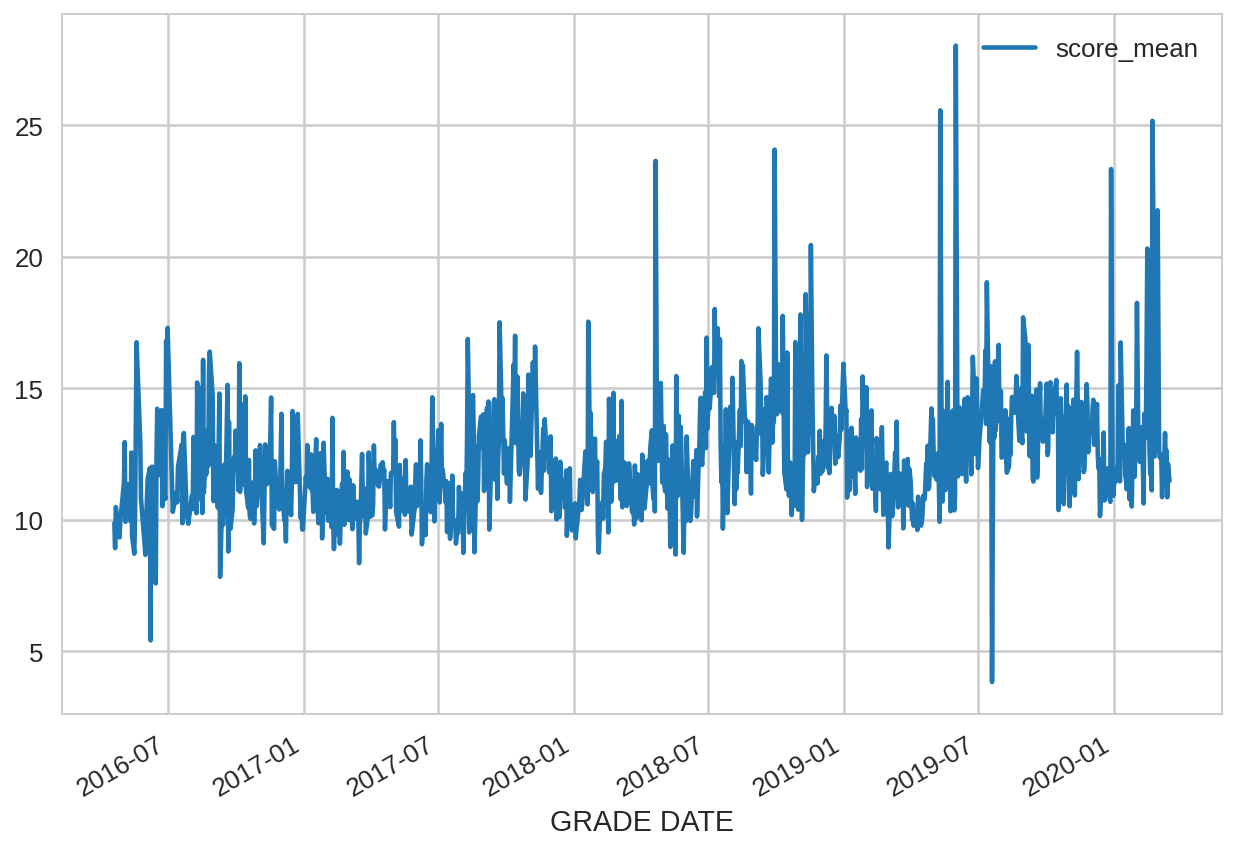

In [164]:
(
  restaurants
  .groupby('GRADE DATE')
  .agg(
      score_mean = ('SCORE', 'mean'), # calculate the aveage score for the date
      graded_restaurants = ('CAMIS', 'nunique') # and the number of restaurants
    )
  .query('graded_restaurants>10') # keep only days with at least 10 graded restauranta
  .filter(items=['score_mean']) # we only want to plot the score
  .plot()
)

## Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [ ]:
# Count the number of CAMIS values that appear on each date

pivot = pd.pivot_table(
    data=restaurants,
    index="GRADE DATE",  # specifies the rows
    values="CAMIS",  # specifies the content of the cells
    aggfunc="count",  # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.plot(figsize=(10, 5))

In [ ]:
pivot[400:500].plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample("1W").sum().tail(100)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
# Plot the average number of inspections, over 7-day periods
pivot.resample("1W").mean().plot()

In [ ]:
# Plot the total number of inspections, over 1-month periods
pivot.resample("1M").sum().plot()

In [ ]:
plot = pivot.resample("7D").mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data=restaurants,  #
    index="INSPECTION DATE",
    columns="BORO",
    values="CAMIS",
    aggfunc="count",
)
pivot2.head(10)

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'0'* column is also noise. We can use the `drop` command of Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime("1900-01-01"), axis="index")

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop("0", axis="columns")

In [ ]:
pivot2.tail(5)

In [ ]:
pivot2.plot()

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample("1M").mean().tail(10)

In [ ]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample("1M").mean().plot()

# Potential Exercise, if we have time:
# Drop the last date, which corresponds to an incomplete month

## (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the
# number of unique items in a list x
def count_unique(x):
    return len(set(x))


# We break down by BORO and GRADE, and also calculate
# inspections in unique (unique restaurants)
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data=restaurants,  #
    index="GRADE DATE",
    columns=["BORO", "GRADE"],
    values="CAMIS",
    aggfunc=["count", count_unique],
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample("1M").sum()

# Show the last 5 entries and show the transpose (.T)
agg.tail().T

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data=restaurants,
    index="INSPECTION DATE",  # specifies the rows
    values="SCORE",  # specifies the content of the cells
    aggfunc="mean",  # compute the average SCORE
)

In [ ]:
pivot.plot(figsize=(10, 4))

In [ ]:
pivot.resample("1W").mean().plot(figsize=(10, 4))



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
# your code here

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data=restaurants,
    index="INSPECTION DATE",  # dates are the rows
    columns="CUISINE DESCRIPTION",  # cuisines are the columns
    values="SCORE",  # we analyze the SCORE
    aggfunc="mean",  # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[["American", "French", "Chinese"]].resample("1M").mean().plot(figsize=(10, 4))